


# Projet 7 : Implémentez un modèle de scoring : LightGBM

L'objectif de ce notebook est d'évaluer notre classification avec LightGBM

[LightGBM](https://datascience.eu/fr/apprentissage-automatique/quest-ce-que-la-gbm-legere/) est un algorithme de machine learning basé sur le Gradient Boosting Machine (GBM), il est rapide, distribué, avec de grandes performances et repose sur des arbres de décisions.


Paramètres : 

- (max_depth) :  contrôle la distance maximale entre le nœud racine de chaque arbre et un nœud feuille. Diminuer max_depth réduit le temps d'entraînement. 
- (num_leaves):  définit le nombre maximal de nœuds par arbre. Diminuer num_leaves réduit le temps de entraînement.

## Importation des modules

In [1]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 7.5 MB/s eta 0:00:00


In [3]:
import shap

In [4]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns


## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import lightgbm as lgb

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer



## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle

## Warning
import warnings

In [5]:
warnings.filterwarnings("ignore")

##  Importation de données

In [6]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Mounted at /content/drive


In [7]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 47 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   CNT_CHILDREN                 307511 non-null  int64  
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT_x                 307511 non-null  float64
 7   NAME_TYPE_SUITE              306219 non-null  object 
 8   NAME_INCOME_TYPE             307511 non-null  object 
 9   NAME_EDUCATION_TYPE          307511 non-null  object 
 10  NAME_FAMILY_STATUS           307511 non-null  object 
 11  REGION_POPULATION_RELATIVE   307511 non-null  float64
 12  DAYS_BIRTH                   307511 non-null  int64  
 13 

In [9]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [10]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

## Mise en place du modèle

In [11]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier

In [12]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [14]:
lgb = LGBMClassifier(random_state=0,scale_pos_weight=1.1)
lgb.fit(X_train_smtomek, y_train_smtomek)

LGBMClassifier(random_state=0, scale_pos_weight=1.1)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79    113151
           1       0.15      0.65      0.24      9854

    accuracy                           0.67    123005
   macro avg       0.55      0.66      0.51    123005
weighted avg       0.89      0.67      0.74    123005



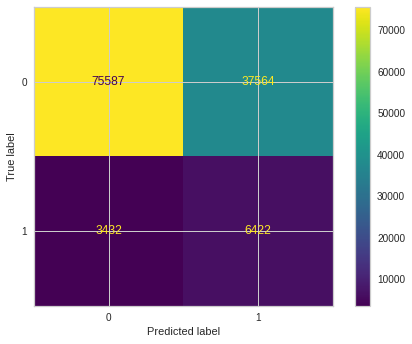

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = lgb.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb.classes_).plot()
plt.show()

In [16]:
grid_params = { 
   'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10]}
  

In [17]:
from sklearn.metrics import fbeta_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

fone_scorer = make_scorer(fbeta_score,
                          beta=1,
                          
                          pos_label=0)
#'class_weight': [{0: 0.47 ,  1: 0.53}]

                 
#grid_params = { 'scale_pos_weight': np.arange(0.1,1,1.0)}
#grid_params = { 'scale_pos_weight': 1.1}

lgb_fOne = RandomizedSearchCV(lgb,
                          grid_params,verbose=1,cv=10,scoring = fone_scorer,n_jobs = 5,n_iter=10)
lgb_fOne.fit(X_train_smtomek, y_train_smtomek , eval_metric = 'aucpr')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=LGBMClassifier(random_state=0,
                                            scale_pos_weight=1.1),
                   n_jobs=5,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   scoring=make_scorer(fbeta_score, beta=1, pos_label=0),
                   verbose=1)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79    113151
           1       0.15      0.65      0.24      9854

    accuracy                           0.67    123005
   macro avg       0.55      0.66      0.51    123005
weighted avg       0.89      0.67      0.75    123005



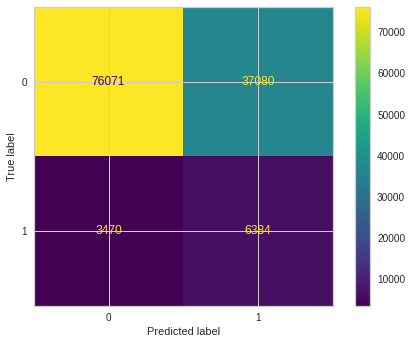

In [18]:
y_pred = lgb_fOne.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb_fOne.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb_fOne.classes_).plot()
plt.show()

In [19]:
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
import numpy as np

fone_scorer = make_scorer(fbeta_score,
                          beta=10,
                          
                          pos_label=0)
lgb_ftwo = RandomizedSearchCV(lgb,
                          grid_params,verbose=1,cv=10,scoring = fone_scorer,n_jobs = 5,n_iter=10)
lgb_ftwo.fit(X_train_smtomek, y_train_smtomek , eval_metric = 'aucpr')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=LGBMClassifier(random_state=0,
                                            scale_pos_weight=1.1),
                   n_jobs=5,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   scoring=make_scorer(fbeta_score, beta=10, pos_label=0),
                   verbose=1)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79    113151
           1       0.15      0.65      0.24      9854

    accuracy                           0.67    123005
   macro avg       0.55      0.66      0.51    123005
weighted avg       0.89      0.67      0.75    123005



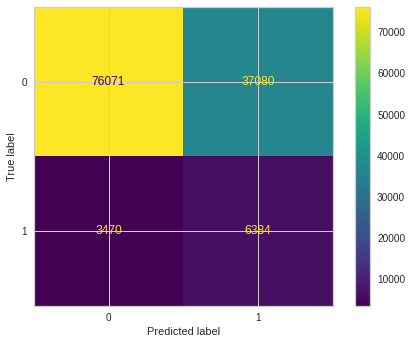

In [20]:
y_pred = lgb_ftwo.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb_ftwo.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb_ftwo.classes_).plot()
plt.show()

In [21]:
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
import numpy as np

fone_scorer = make_scorer(fbeta_score,
                          beta=3,
                          greater_is_better = True,
                          pos_label=0)

lgb_fthree = RandomizedSearchCV(lgb,
                          grid_params,verbose=1,cv=10,scoring = fone_scorer,n_jobs = 5,n_iter=10)
lgb_fthree.fit(X_train_smtomek, y_train_smtomek , eval_metric = 'aucpr')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=LGBMClassifier(random_state=0,
                                            scale_pos_weight=1.1),
                   n_jobs=5,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   scoring=make_scorer(fbeta_score, beta=3, pos_label=0),
                   verbose=1)

              precision    recall  f1-score   support

           0       0.96      0.67      0.79    113151
           1       0.15      0.65      0.24      9854

    accuracy                           0.67    123005
   macro avg       0.55      0.66      0.51    123005
weighted avg       0.89      0.67      0.75    123005



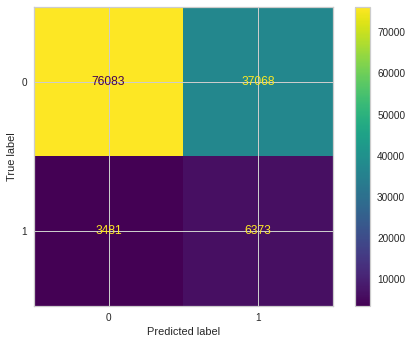

In [22]:
y_pred = lgb_fthree.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb_fthree.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb_fthree.classes_).plot()
plt.show()

Text(0.5, 1.0, 'Fbeta scores with beta 0 to 100')

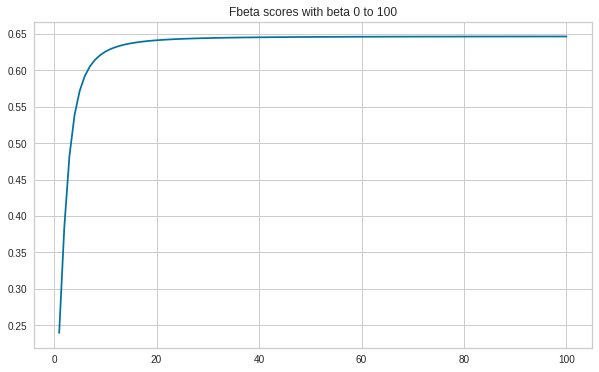

In [23]:
beta_score_list = []
for i in range(1,101):
    fbeta_results = fbeta_score(y_test_smtomek,y_pred,beta=i)
    beta_score_list.append(fbeta_results)
fig2 = plt.figure(figsize=(10,6))
sns.lineplot(x=range(1,101),y=beta_score_list)
plt.title("Fbeta scores with beta 0 to 100")

## Feature Importance

In [24]:
pd.set_option('display.max_columns', None)
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,100002,1,Cash loans,M,0,202500.0,406597.5,Unaccompanied,working,low_educ,not_married,0.018801,-9461,-637,NaN,other,1.0,2,2,10,0,0.0149,2.0,1,1.0,Closed,-874.00,108131.945625,NaN,NaN,NaN,NaN,-20.421053,0.0,9251.775,179055.00,0.00,-606.000000,24.000000,365243.0,-25.000000,-17.000000,Approved,XAP,New,15.000000,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,Family,working,high_educ,married,0.003541,-16765,-1188,NaN,other,2.0,1,1,11,0,0.0714,0.0,1,0.0,Closed,-1400.75,254350.125000,NaN,NaN,NaN,NaN,-7.000000,0.0,56553.990,484191.00,3442.50,-1305.000000,10.000000,365243.0,-1054.333333,-1047.333333,Approved,XAP,Refreshed,4.909091,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,Unaccompanied,working,low_educ,not_married,0.010032,-19046,-225,26.0,other,1.0,2,2,9,0,NaN,0.0,0,0.0,Closed,-867.00,94518.900000,NaN,NaN,NaN,NaN,-3.000000,0.0,5357.250,20106.00,4860.00,-815.000000,4.000000,365243.0,-724.000000,-714.000000,Approved,XAP,New,0.000000,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,Unaccompanied,working,low_educ,married,0.008019,-19005,-3039,NaN,other,2.0,2,2,17,0,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,-19.375000,0.0,23651.175,291695.50,34840.17,-272.444444,23.000000,365243.0,182477.500000,182481.750000,Approved,XAP,Repeater,8.650000,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,Unaccompanied,working,low_educ,not_married,0.028663,-19932,-3038,NaN,other,1.0,2,2,11,1,NaN,0.0,0,0.0,Closed,-1149.00,146250.000000,NaN,NaN,NaN,NaN,-6.320000,0.0,12278.805,166638.75,3390.75,-1222.833333,20.666667,365243.0,72136.200000,72143.800000,Approved,XAP,Repeater,11.666667,0.0


In [25]:
from sklearn.inspection import permutation_importance

In [26]:
pd.set_option('display.max_columns', None)
dataset.sample(1000)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
84620,198171,0,Cash loans,F,1,180000.0,946764.0,Unaccompanied,working,low_educ,married,0.030755,-8331,-1663,NaN,other,3.0,2,2,16,1,NaN,3.0,1,NaN,NaN,NaN,NaN,106023.5400,8266.56000,0.0,0.0,-5.911765,-146.067353,7629.840000,75973.500000,0.000000,-368.666667,6.000000,182484.50,182541.0,182542.500000,Approved,XAP,Repeater,6.000000,0.0
298398,445691,0,Cash loans,F,1,45000.0,180000.0,"Spouse, partner",working,low_educ,married,0.026392,-11728,-118,NaN,other,3.0,2,2,10,0,0.0980,0.0,0,2.0,Active,-1435.666667,73137.00000,NaN,NaN,NaN,NaN,NaN,NaN,8227.203750,84097.125000,826.875000,-1970.250000,12.250000,365243.00,-1942.0,-1935.000000,Refused,LIMIT,Repeater,NaN,NaN
195439,326621,0,Cash loans,M,0,247500.0,929736.0,Unaccompanied,working,high_educ,not_married,0.072508,-10524,-940,64.0,other,1.0,1,1,11,0,0.2444,0.0,1,3.0,Active,-448.600000,44560.35000,818747.1825,46176.73875,0.0,0.0,-4.444444,-553.136111,14794.290000,180138.937500,2782.285714,-1562.500000,10.666667,273758.25,181403.0,181412.000000,Approved,XAP,Repeater,7.000000,0.0
251052,390488,0,Cash loans,F,0,135000.0,675000.0,Family,working,low_educ,other,0.026392,-21503,365243,NaN,NaN,1.0,2,2,17,0,0.3541,0.0,0,0.0,Closed,-1082.000000,121500.00000,NaN,NaN,NaN,NaN,NaN,NaN,5334.975000,48019.500000,5160.000000,-2820.333333,10.000000,365243.00,-2530.0,-2526.500000,Approved,XAP,Repeater,NaN,NaN
267382,409786,0,Revolving loans,F,0,90000.0,135000.0,Family,working,low_educ,married,0.028663,-19336,-2597,NaN,other,2.0,2,2,16,1,NaN,0.0,0,0.0,Closed,-1274.250000,105532.49250,NaN,NaN,NaN,NaN,-12.666667,0.000000,4608.330000,32749.500000,1446.000000,-944.333333,9.333333,365243.00,-989.5,-986.500000,Approved,XAP,Refreshed,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184024,313295,0,Cash loans,F,0,135000.0,1019610.0,Unaccompanied,working,high_educ,married,0.035792,-18749,-9270,12.0,other,2.0,2,2,17,1,NaN,0.0,1,4.0,Active,-1710.375000,187029.56250,0.0000,NaN,0.0,0.0,-8.037037,0.000000,14434.805000,262245.000000,3428.182500,-1823.333333,16.222222,365243.00,50971.0,-1312.428571,Approved,XAP,Repeater,6.821429,0.0
54488,163130,0,Cash loans,F,0,112500.0,808650.0,Unaccompanied,working,high_educ,other,0.010556,-23649,365243,NaN,NaN,1.0,3,3,11,0,0.0816,0.0,0,0.0,Closed,-1244.625000,135318.18375,NaN,NaN,NaN,NaN,NaN,NaN,8965.710000,74776.500000,36000.000000,-2089.000000,12.000000,365243.00,-1848.0,-1843.000000,Approved,XAP,New,NaN,NaN
9265,110776,0,Cash loans,F,0,81000.0,355536.0,Unaccompanied,working,low_educ,married,0.002134,-15903,-4754,NaN,other,2.0,3,3,7,0,0.0081,0.0,1,7.0,Closed,-1305.125000,344433.93750,NaN,NaN,NaN,NaN,-14.400000,0.000000,16795.317273,281273.029412,6985.125000,-1094.882353,26.000000,365243.00,44502.0,44508.375000,Approved,XAP,Repeater,35.562500,0.0
236661,374120,0,Cash loans,F,0,67500.0,225000.0,Family,working,low_educ,married,0.018801,-11445,-1388,8.0,other,2.0,2,2,12,1,NaN,0.0,1,0.0,Active,-856.000000,45000.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


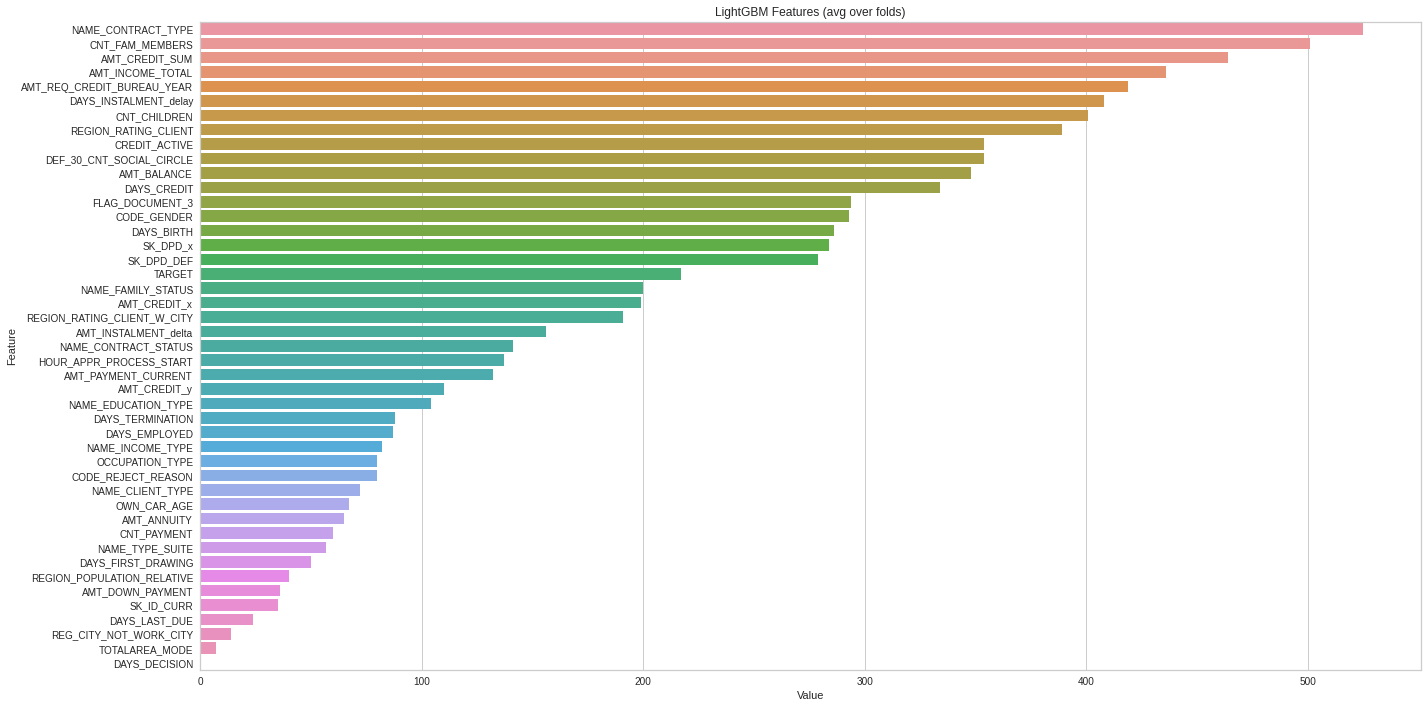

<Figure size 576x396 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, dataset.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb_fOne.best_estimator_.feature_importances_,dataset.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [30]:
pickle_out = open(PATH + "Lightest.pkl", "wb")
pickle.dump(lgb_fOne, pickle_out)
pickle_out.close()

On va donc , dans le Notebook suivant, selectionner nos features importantes et ensuite réappliquer LightGBM dessus pour la mise en place de notre application.